In [13]:
from datasets import advice
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import DataLoader
import json
import models
from sklearn.metrics import confusion_matrix
import tqdm

In [60]:
test_ds = advice.AdviceDataset('data/advice_gen',10)

In [54]:
test_name = 'advice_resnet18_1'

In [61]:
with open(f'logs/{test_name}/config.json') as f:
    config = json.load(f)
model_name = config['model_name']
model_kwargs = config['model_kwargs']
model = getattr(models, model_name)(**model_kwargs).to('cuda')
model.load_state_dict(torch.load(f'logs/{test_name}/checkpoints/best_acc.pt'))
model = model.eval()

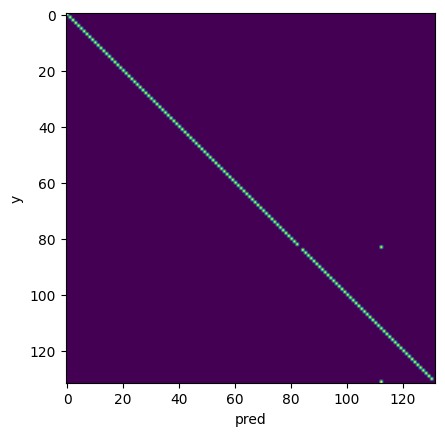

In [65]:
test_loader = DataLoader(test_ds, batch_size=1, shuffle=True, num_workers=16)
y_list= []
preds = []
for x, y in tqdm.tqdm(test_loader, ncols=100, leave=False,):
    x = x.to('cuda')
    y = y.to('cuda')
    y_hat = model(x)
    y_list.append(y.item())
    preds.append(y_hat.argmax(dim=1).item())
y_list = np.array(y_list)
preds = np.array(preds)
# confusion matrix of pred and y
cm = confusion_matrix(y_list, preds)
# plot confusion matrix
plt.imshow(cm)
# axis name
plt.xlabel('pred')
plt.ylabel('y')
plt.show()

In [67]:
for x, y in zip(np.nonzero(cm)[0], np.nonzero(cm)[1]):
    if x != y:
        print(x, y)

83 112
131 112


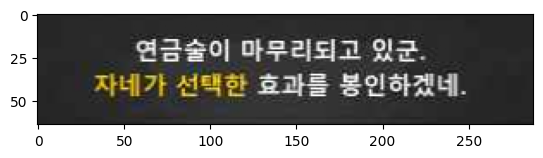

In [66]:
plt.imshow(test_ds[131][0].permute(1,2,0))
plt.show()

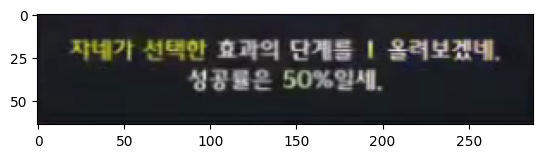

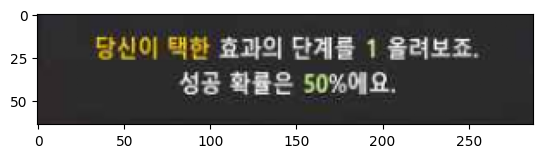

----------------------------------------------------------------------------------------------------


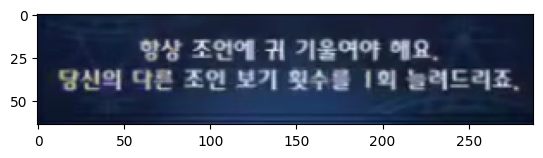

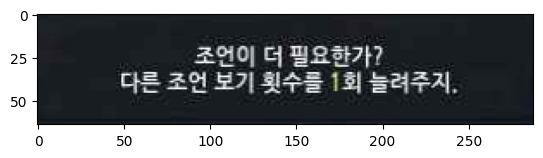

----------------------------------------------------------------------------------------------------


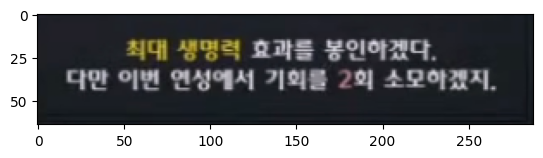

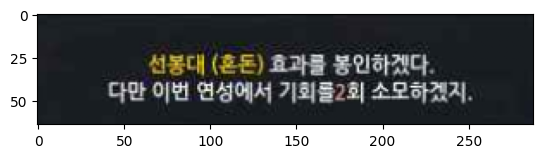

----------------------------------------------------------------------------------------------------


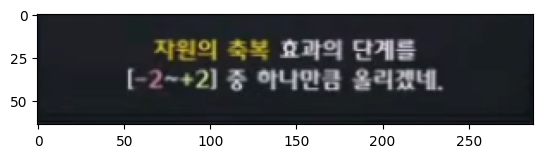

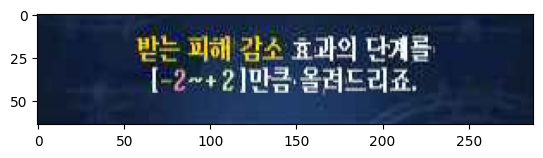

----------------------------------------------------------------------------------------------------


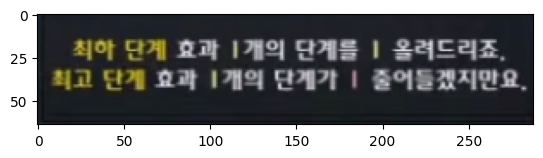

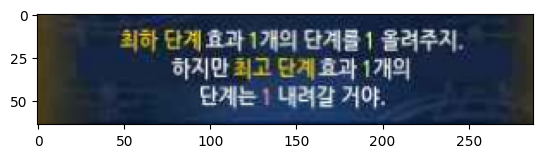

----------------------------------------------------------------------------------------------------


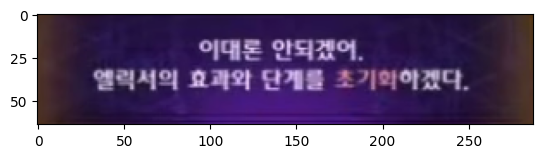

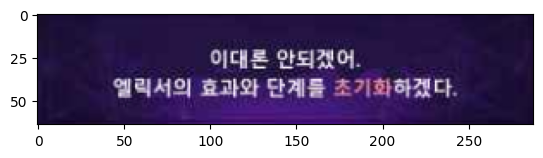

----------------------------------------------------------------------------------------------------


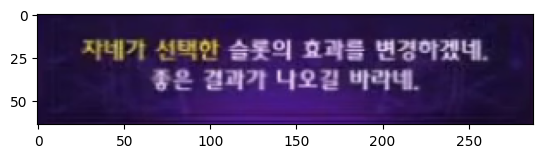

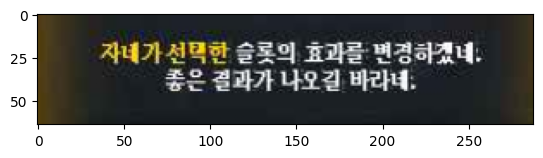

----------------------------------------------------------------------------------------------------


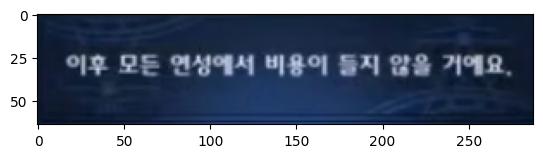

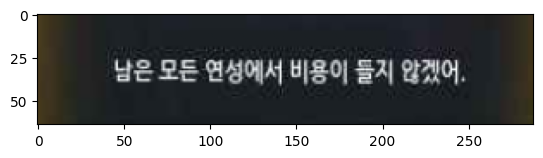

----------------------------------------------------------------------------------------------------


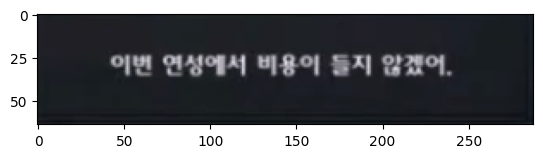

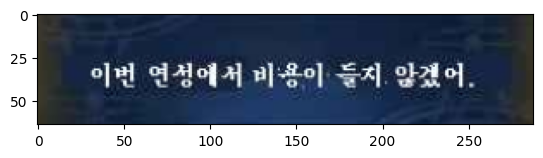

----------------------------------------------------------------------------------------------------


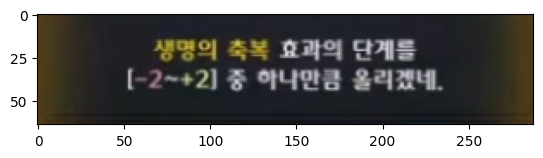

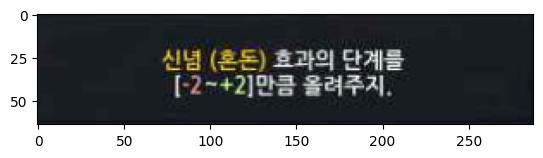

----------------------------------------------------------------------------------------------------


In [85]:
from torchvision.io import read_image
from torchvision.transforms import Resize
for idx in range(100, 110):
    test_img = read_image(f'data/advice_cut/{idx}.png').to(torch.float32)/255
    test_img = Resize((64,288))(test_img)
    plt.imshow(test_img.permute(1,2,0))
    plt.show()
    test_img_pred = model(test_img.unsqueeze(0).to('cuda'))
    pred_cls = test_img_pred.argmax(dim=1).item()
    plt.imshow(test_ds[pred_cls][0].permute(1,2,0))
    plt.show()
    print('-'*100)
